In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from  sklearn.ensemble import IsolationForest
from datetime import datetime
import warnings
import sklearn
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import feature_selection
from sklearn.feature_selection import f_regression
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA



In [322]:
original_data = pd.read_csv('C:/Users/atade/OneDrive/Рабочий стол/Learning/Training/House/train.csv')
data = original_data.copy()
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [323]:

for i in data.columns:
    if data[i].count() < 0.7 * 1460:
        data.drop(i, axis=1, inplace=True)

data.drop('Id', inplace=True, axis=1)


In [324]:

list_of_types_object = list()
list_of_types_num = list()

for i in data.columns:
    if data[i].dtype != np.dtype('int64') and data[i].dtype != np.dtype('float64'):
        list_of_types_object.append(i)
    else:
        list_of_types_num.append(i)


data_object = data[list_of_types_object]
data_num = data[list_of_types_num]

data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [325]:
dict_of_lenghts = dict()
list_for_del = list()

for i in data_object.columns:
    dict_of_lenghts[i] = [len(data_object[i].value_counts()), round(data_object[i].value_counts(normalize=True, sort=True)[0], 3)]

print('len(dict_of_lenghts) before:', len(dict_of_lenghts))

for i, val in dict_of_lenghts.items():
    if val[1] > 0.9:
        list_for_del.append(i)

for i in list_for_del:
    dict_of_lenghts.pop(i)


print('len(dict_of_lenghts) after:', len(dict_of_lenghts))

data_object = data_object[dict_of_lenghts.keys()]
dict_of_lenghts_object = dict_of_lenghts.copy()

len(dict_of_lenghts) before: 37
len(dict_of_lenghts) after: 24


In [326]:
data_for_box = data_num['BedroomAbvGr'].value_counts() 

In [327]:
dict_of_lenghts = dict()
list_for_del = list()



for i in data_num.columns:
    dict_of_lenghts[i] = [len(data_num[i].value_counts()), round(data_num[i].value_counts(normalize=True, sort=True).max(), 3)]

print(f'len(dict_of_lenghts) before: {len(dict_of_lenghts)}')

for i, val in dict_of_lenghts.items():
    if val[1] > 0.9:
        list_for_del.append(i)

for i in list_for_del:
    dict_of_lenghts.pop(i)


print('len(dict_of_lenghts) after:', len(dict_of_lenghts))

data_num = data_num[dict_of_lenghts.keys()]


len(dict_of_lenghts) before: 37
len(dict_of_lenghts) after: 30


In [328]:
for i in data_num.columns:
    data_num[i].fillna(data_num[i].mean(), inplace=True)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [329]:
for i in data_object.columns:
    data_object[i].fillna(data_object[i].mode()[0], inplace=True)
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LandContour    1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   Condition1     1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   Exterior1st    1460 non-null   object
 10  Exterior2nd    1460 non-null   object
 11  ExterQual      1460 non-null   object
 12  ExterCond      1460 non-null   object
 13  Foundation     1460 non-null   object
 14  BsmtQual       1460 non-null   object
 15  BsmtExposure   1460 non-null   object
 16  BsmtFinType1   1460 non-null   object
 17  BsmtFinType2   1460 non-null   object
 18  HeatingQC      1460 non-null

In [330]:
data_num['YearBuilt'] = 2023 - data_num['YearBuilt']
data_num['YearRemodAdd'] = 2023 - data_num['YearRemodAdd']

In [331]:
def sigma_3(df, col, emiss=False, log_scale=False, left_s=3, right_s=3):


    if log_scale:
        x = np.log(data[col]+1)
    else:
        x = data[col]

    sigma = df[col].std()
    mu = df[col].mean()
    form_min = mu - left_s*sigma
    form_max = mu + right_s*sigma

    sorted_df = df[(df[col] < form_max) & (df[col] > form_min)]
    emission_list = df[(df[col] >= form_max) | (df[col] <= form_min)][col].values
    if emiss:
        return sorted_df, emission_list
    return sorted_df

def outliers_z_score_mod_log(data, feature, log_scale=False, left=3,right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return cleaned, outliers

count = 0

for i in data_num.drop(columns=['SalePrice']).columns:
    
    data_num, emiss = outliers_z_score_mod_log(data_num,i, False)
    count += len(emiss)
    print(len(emiss), i, count)

    '''
0 MSSubClass 0
47 LotFrontage 47
21 LotArea 68
5 OverallQual 73
5 OverallCond 78
0 YearBuilt 78
0 YearRemodAdd 78
0 MasVnrArea 78
0 BsmtFinSF1 78
61 BsmtFinSF2 139
93 BsmtUnfSF 232
8 TotalBsmtSF 240
0 1stFlrSF 240
0 2ndFlrSF 240
3 GrLivArea 243
0 BsmtFullBath 243
2 FullBath 245
0 HalfBath 245
34 BedroomAbvGr 279
1 TotRmsAbvGrd 280
0 Fireplaces 280
1 GarageYrBlt 281
53 GarageCars 334
0 GarageArea 334
0 WoodDeckSF 334
0 OpenPorchSF 334
3 EnclosedPorch 337
0 MoSold 337
0 YrSold 337'''

30 MSSubClass 30
16 LotFrontage 46
16 LotArea 62
5 OverallQual 67
26 OverallCond 93
6 YearBuilt 99
0 YearRemodAdd 99
30 MasVnrArea 129
2 BsmtFinSF1 131
44 BsmtFinSF2 175
8 BsmtUnfSF 183
2 TotalBsmtSF 185
5 1stFlrSF 190
1 2ndFlrSF 191
10 GrLivArea 201
11 BsmtFullBath 212
0 FullBath 212
9 HalfBath 221
6 BedroomAbvGr 227
9 TotRmsAbvGrd 236
3 Fireplaces 239
1 GarageYrBlt 240
1 GarageCars 241
2 GarageArea 243
15 WoodDeckSF 258
24 OpenPorchSF 282
41 EnclosedPorch 323
0 MoSold 323
0 YrSold 323


In [332]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137 entries, 0 to 1456
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1137 non-null   int64  
 1   LotFrontage    1137 non-null   float64
 2   LotArea        1137 non-null   int64  
 3   OverallQual    1137 non-null   int64  
 4   OverallCond    1137 non-null   int64  
 5   YearBuilt      1137 non-null   int64  
 6   YearRemodAdd   1137 non-null   int64  
 7   MasVnrArea     1137 non-null   float64
 8   BsmtFinSF1     1137 non-null   int64  
 9   BsmtFinSF2     1137 non-null   int64  
 10  BsmtUnfSF      1137 non-null   int64  
 11  TotalBsmtSF    1137 non-null   int64  
 12  1stFlrSF       1137 non-null   int64  
 13  2ndFlrSF       1137 non-null   int64  
 14  GrLivArea      1137 non-null   int64  
 15  BsmtFullBath   1137 non-null   int64  
 16  FullBath       1137 non-null   int64  
 17  HalfBath       1137 non-null   int64  
 18  BedroomAbvGr 

In [333]:
dict_of_lenghts_object

{'MSZoning': [5, 0.788],
 'LotShape': [4, 0.634],
 'LandContour': [4, 0.898],
 'LotConfig': [5, 0.721],
 'Neighborhood': [25, 0.154],
 'Condition1': [9, 0.863],
 'BldgType': [5, 0.836],
 'HouseStyle': [8, 0.497],
 'RoofStyle': [6, 0.782],
 'Exterior1st': [15, 0.353],
 'Exterior2nd': [16, 0.345],
 'ExterQual': [4, 0.621],
 'ExterCond': [5, 0.878],
 'Foundation': [6, 0.443],
 'BsmtQual': [4, 0.456],
 'BsmtExposure': [4, 0.67],
 'BsmtFinType1': [6, 0.302],
 'BsmtFinType2': [6, 0.883],
 'HeatingQC': [5, 0.508],
 'KitchenQual': [4, 0.503],
 'GarageType': [6, 0.631],
 'GarageFinish': [3, 0.439],
 'SaleType': [9, 0.868],
 'SaleCondition': [6, 0.821]}

In [334]:
coder = preprocessing.OneHotEncoder()

new_data = coder.fit_transform(data_object).toarray()



new_data = pd.DataFrame(data=new_data, columns=coder.get_feature_names_out())
data_object = new_data.copy()



new_data = pd.concat([data_num, new_data], axis=1, join='inner')

In [335]:
best_num_cols = abs(data_num.corr()['SalePrice']).sort_values(ascending=False)[:20].index

abs(data_num.corr()['SalePrice']).sort_values(ascending=False)[:20]


SalePrice       1.000000
OverallQual     0.806538
GrLivArea       0.720705
GarageCars      0.668582
GarageArea      0.645736
YearBuilt       0.627014
TotalBsmtSF     0.615817
FullBath        0.611308
1stFlrSF        0.569445
YearRemodAdd    0.559853
GarageYrBlt     0.545107
TotRmsAbvGrd    0.520899
Fireplaces      0.427280
MasVnrArea      0.405620
OpenPorchSF     0.400632
BsmtFinSF1      0.388424
LotFrontage     0.371324
LotArea         0.343367
WoodDeckSF      0.325234
2ndFlrSF        0.290038
Name: SalePrice, dtype: float64

In [336]:
best_obj_cols = abs(pd.concat([data_object, data_num['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending=False)[:20].index

abs(pd.concat([data_object, data_num['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending=False)[:20]


SalePrice               1.000000
ExterQual_TA            0.646956
GarageFinish_Unf        0.577988
KitchenQual_TA          0.577861
BsmtQual_TA             0.570370
Foundation_PConc        0.566992
ExterQual_Gd            0.564654
BsmtQual_Ex             0.528063
BsmtFinType1_GLQ        0.488051
HeatingQC_Ex            0.487765
KitchenQual_Gd          0.442552
KitchenQual_Ex          0.416678
Exterior1st_VinylSd     0.404532
GarageType_Detchd       0.402428
Exterior2nd_VinylSd     0.401271
Foundation_CBlock       0.401183
GarageFinish_Fin        0.400337
Neighborhood_NridgHt    0.388808
HeatingQC_TA            0.372707
SaleType_New            0.363793
Name: SalePrice, dtype: float64

In [337]:
best_obj_cols = best_obj_cols.delete(0)

In [338]:
data_sorted = pd.concat([data_num[best_num_cols], data_object[best_obj_cols]], axis=1, join='inner')
data_sorted.reset_index(inplace=True)
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1137 non-null   int64  
 1   SalePrice             1137 non-null   int64  
 2   OverallQual           1137 non-null   int64  
 3   GrLivArea             1137 non-null   int64  
 4   GarageCars            1137 non-null   int64  
 5   GarageArea            1137 non-null   int64  
 6   YearBuilt             1137 non-null   int64  
 7   TotalBsmtSF           1137 non-null   int64  
 8   FullBath              1137 non-null   int64  
 9   1stFlrSF              1137 non-null   int64  
 10  YearRemodAdd          1137 non-null   int64  
 11  GarageYrBlt           1137 non-null   float64
 12  TotRmsAbvGrd          1137 non-null   int64  
 13  Fireplaces            1137 non-null   int64  
 14  MasVnrArea            1137 non-null   float64
 15  OpenPorchSF          

In [339]:
data_sorted = data_sorted[abs(data_sorted.corr()['SalePrice']).sort_values(ascending=False)[:30].index]

<AxesSubplot: >

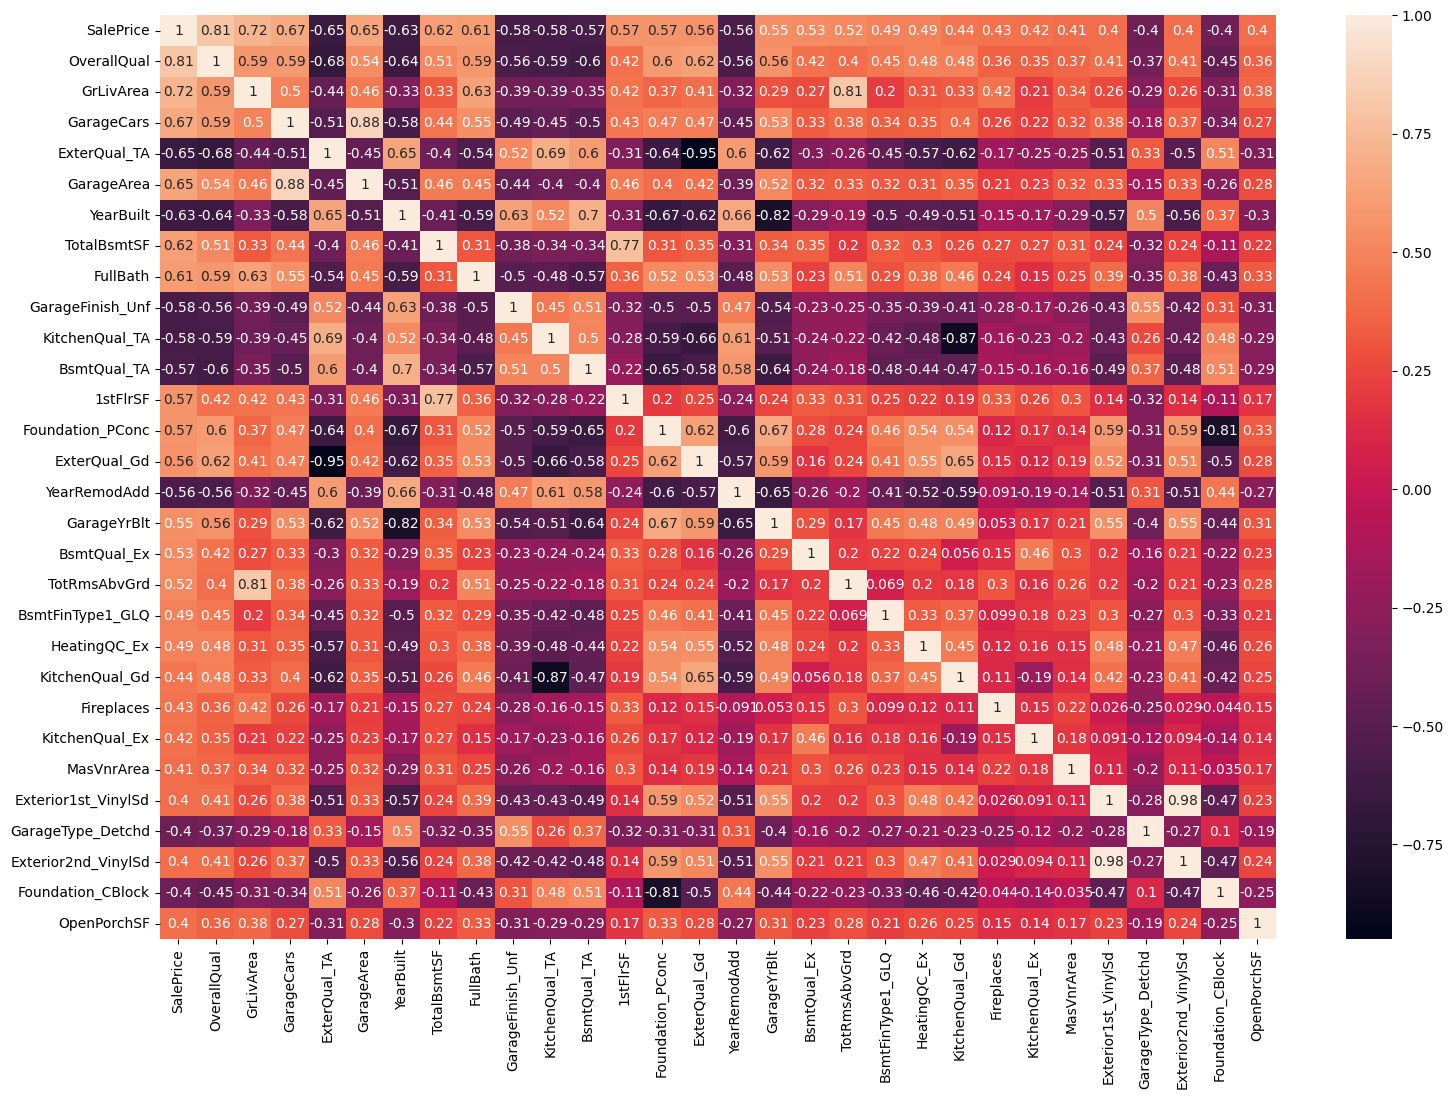

In [340]:
plt.subplots(figsize=(18,12))

sns.heatmap(data_sorted.corr(), annot=True)

In [341]:
pca = PCA(n_components=1, random_state=42)
pca_garage = pca.fit_transform(X=data_sorted[['GarageCars', 'GarageArea']])
pca_other = pca.fit_transform(X=data_sorted[['1stFlrSF', 'TotalBsmtSF']])


# Также у признака "TotRmsAbvGrd" высокая корреляция с "GrLivArea" однако его корреляция с таргетом = 0.533723, поэтому разумнее удалить его
# чтобы не потерять признак "GrLivArea", у которого корр с таргетом высокая 

In [342]:
pca = pd.DataFrame(np.column_stack([pca_garage,pca_other]), columns=['GarageCars_GarageArea', '1stFlrSF_TotalBsmtSF'])
pca

,GarageCars_GarageArea,1stFlrSF_TotalBsmtSF
0,85.682887,-281.154154
1,-2.316676,290.750363
2,145.682590,-191.001717
3,373.684608,125.940441
4,17.683225,-365.672062
...,...,...
1132,62.683001,-379.605726
1133,-462.320694,118.897282
1134,-62.316379,232.996459
1135,-2.316676,-144.516868


In [343]:
data_sorted = pd.concat([data_sorted.drop(columns=['TotRmsAbvGrd','GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF']), pca], axis=1, join='inner')


In [344]:
data_sorted

,SalePrice,OverallQual,GrLivArea,ExterQual_TA,YearBuilt,FullBath,GarageFinish_Unf,KitchenQual_TA,BsmtQual_TA,Foundation_PConc,...,Fireplaces,KitchenQual_Ex,MasVnrArea,Exterior1st_VinylSd,GarageType_Detchd,Exterior2nd_VinylSd,Foundation_CBlock,OpenPorchSF,GarageCars_GarageArea,1stFlrSF_TotalBsmtSF
0,208500,7,1710,0.0,20,2,0.0,0.0,0.0,1.0,...,0,0.0,196.0,1.0,0.0,1.0,0.0,61,85.682887,-281.154154
1,181500,6,1262,1.0,47,2,0.0,1.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0,-2.316676,290.750363
2,223500,7,1786,0.0,22,2,0.0,0.0,0.0,1.0,...,1,0.0,162.0,1.0,0.0,1.0,0.0,42,145.682590,-191.001717
3,250000,8,2198,0.0,23,2,0.0,0.0,0.0,1.0,...,1,0.0,350.0,1.0,0.0,1.0,0.0,84,373.684608,125.940441
4,143000,5,1362,1.0,30,1,1.0,1.0,0.0,0.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,30,17.683225,-365.672062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,145000,5,1072,1.0,18,1,0.0,1.0,0.0,1.0,...,0,0.0,80.0,1.0,0.0,1.0,0.0,28,62.683001,-379.605726
1133,84500,5,1140,1.0,17,1,1.0,1.0,0.0,1.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,56,-462.320694,118.897282
1134,185000,7,1221,0.0,19,2,0.0,0.0,0.0,1.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,113,-62.316379,232.996459
1135,175000,6,1647,1.0,24,2,0.0,1.0,0.0,1.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,40,-2.316676,-144.516868


<AxesSubplot: >

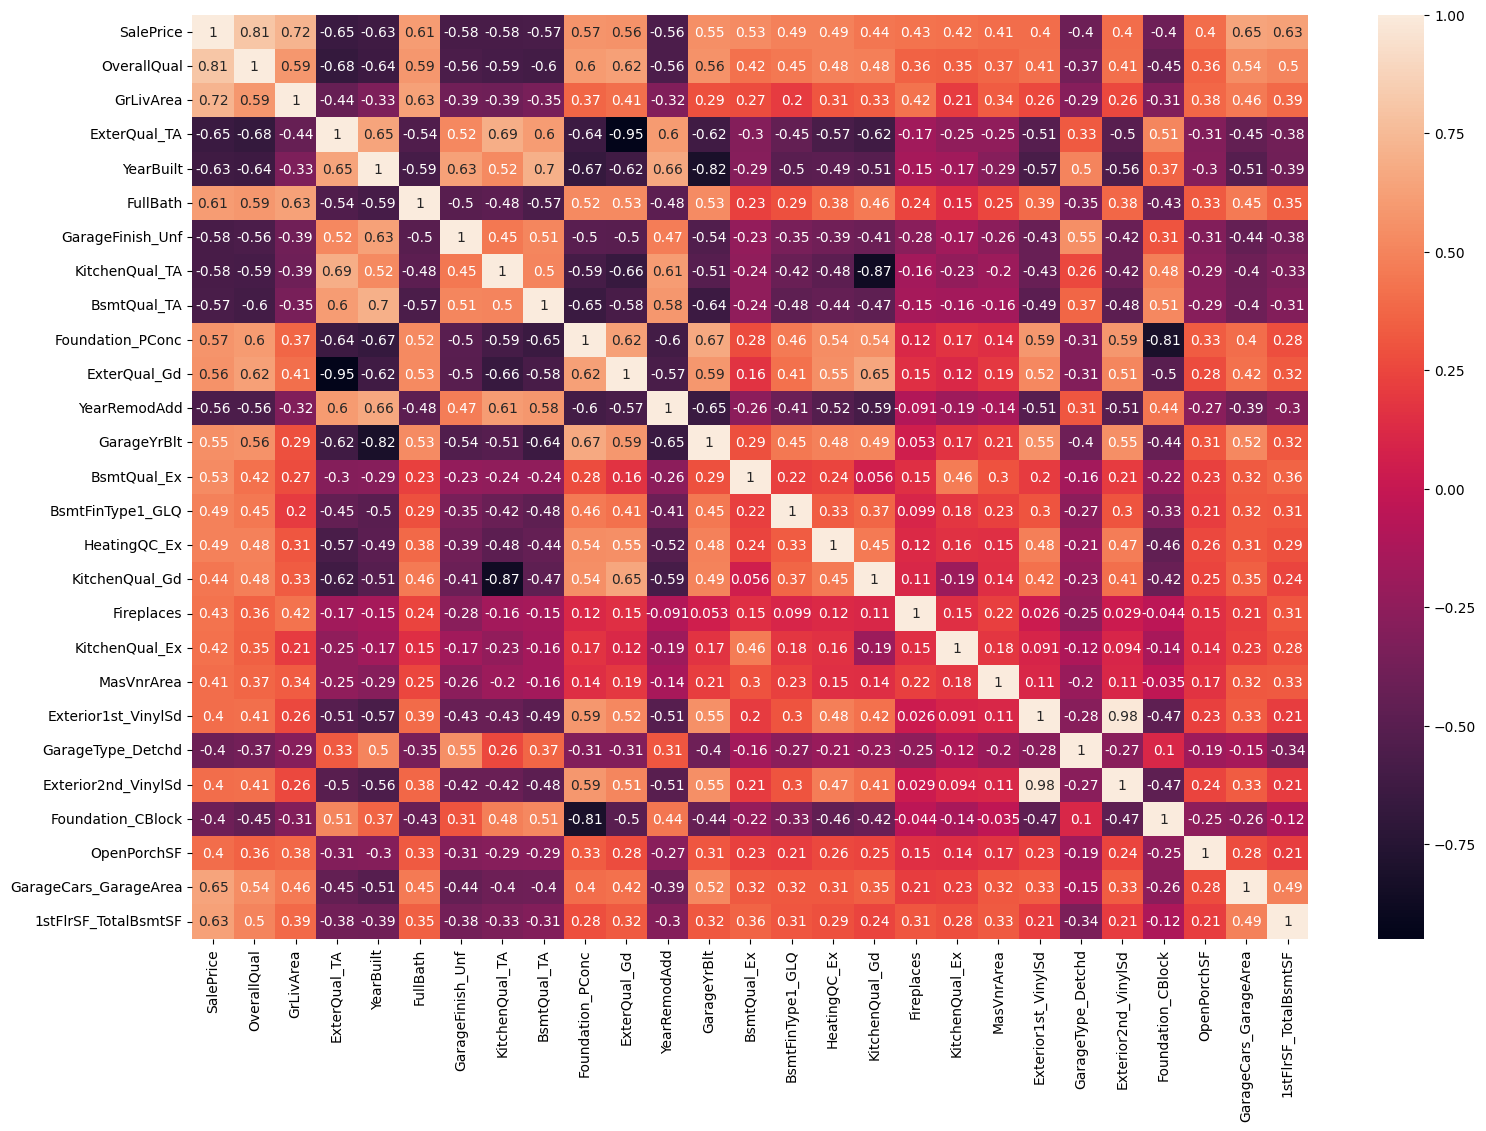

In [345]:
plt.subplots(figsize=(18,12))

sns.heatmap(data_sorted.corr(), annot=True)

In [346]:
data_sorted = data_sorted[abs(data_sorted.corr()['SalePrice']).sort_values(ascending=False)[:30].index]

In [347]:
data_sorted

,SalePrice,OverallQual,GrLivArea,ExterQual_TA,GarageCars_GarageArea,1stFlrSF_TotalBsmtSF,YearBuilt,FullBath,GarageFinish_Unf,KitchenQual_TA,...,HeatingQC_Ex,KitchenQual_Gd,Fireplaces,KitchenQual_Ex,MasVnrArea,Exterior1st_VinylSd,GarageType_Detchd,Exterior2nd_VinylSd,Foundation_CBlock,OpenPorchSF
0,208500,7,1710,0.0,85.682887,-281.154154,20,2,0.0,0.0,...,1.0,1.0,0,0.0,196.0,1.0,0.0,1.0,0.0,61
1,181500,6,1262,1.0,-2.316676,290.750363,47,2,0.0,1.0,...,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0
2,223500,7,1786,0.0,145.682590,-191.001717,22,2,0.0,0.0,...,1.0,1.0,1,0.0,162.0,1.0,0.0,1.0,0.0,42
3,250000,8,2198,0.0,373.684608,125.940441,23,2,0.0,0.0,...,1.0,1.0,1,0.0,350.0,1.0,0.0,1.0,0.0,84
4,143000,5,1362,1.0,17.683225,-365.672062,30,1,1.0,1.0,...,1.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,145000,5,1072,1.0,62.683001,-379.605726,18,1,0.0,1.0,...,0.0,0.0,0,0.0,80.0,1.0,0.0,1.0,0.0,28
1133,84500,5,1140,1.0,-462.320694,118.897282,17,1,1.0,1.0,...,1.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,56
1134,185000,7,1221,0.0,-62.316379,232.996459,19,2,0.0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,113
1135,175000,6,1647,1.0,-2.316676,-144.516868,24,2,0.0,1.0,...,1.0,0.0,1,0.0,0.0,1.0,0.0,1.0,0.0,40


In [348]:
minmax = preprocessing.MinMaxScaler()

SalePrice = data_sorted['SalePrice']

minmax.fit_transform(data_sorted.drop(columns=['SalePrice']))

data_sorted = pd.DataFrame(minmax.fit_transform(data_sorted.drop(columns=['SalePrice'])), columns=data_sorted.drop(columns=['SalePrice']).columns)
data_sorted = pd.concat([SalePrice, data_sorted], axis=1, join='inner')

In [349]:
data_sorted

,SalePrice,OverallQual,GrLivArea,ExterQual_TA,GarageCars_GarageArea,1stFlrSF_TotalBsmtSF,YearBuilt,FullBath,GarageFinish_Unf,KitchenQual_TA,...,HeatingQC_Ex,KitchenQual_Gd,Fireplaces,KitchenQual_Ex,MasVnrArea,Exterior1st_VinylSd,GarageType_Detchd,Exterior2nd_VinylSd,Foundation_CBlock,OpenPorchSF
0,208500,0.571429,0.539193,0.0,0.525409,0.330038,0.050420,0.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.311111,1.0,0.0,1.0,0.0,0.267544
1,181500,0.428571,0.336203,1.0,0.441038,0.542541,0.277311,0.5,0.0,1.0,...,1.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000
2,223500,0.571429,0.573629,0.0,0.582935,0.363536,0.067227,0.5,0.0,0.0,...,1.0,1.0,0.5,0.0,0.257143,1.0,0.0,1.0,0.0,0.184211
3,250000,0.714286,0.760308,0.0,0.801536,0.481303,0.075630,0.5,0.0,0.0,...,1.0,1.0,0.5,0.0,0.555556,1.0,0.0,1.0,0.0,0.368421
4,143000,0.285714,0.381513,1.0,0.460213,0.298633,0.134454,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,145000,0.285714,0.250113,1.0,0.503357,0.293456,0.033613,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.126984,1.0,0.0,1.0,0.0,0.122807
1133,84500,0.285714,0.280924,1.0,0.000000,0.478686,0.025210,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.245614
1134,185000,0.571429,0.317626,0.0,0.383512,0.521082,0.042017,0.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.495614
1135,175000,0.428571,0.510648,1.0,0.441038,0.380808,0.084034,0.5,0.0,1.0,...,1.0,0.0,0.5,0.0,0.000000,1.0,0.0,1.0,0.0,0.175439


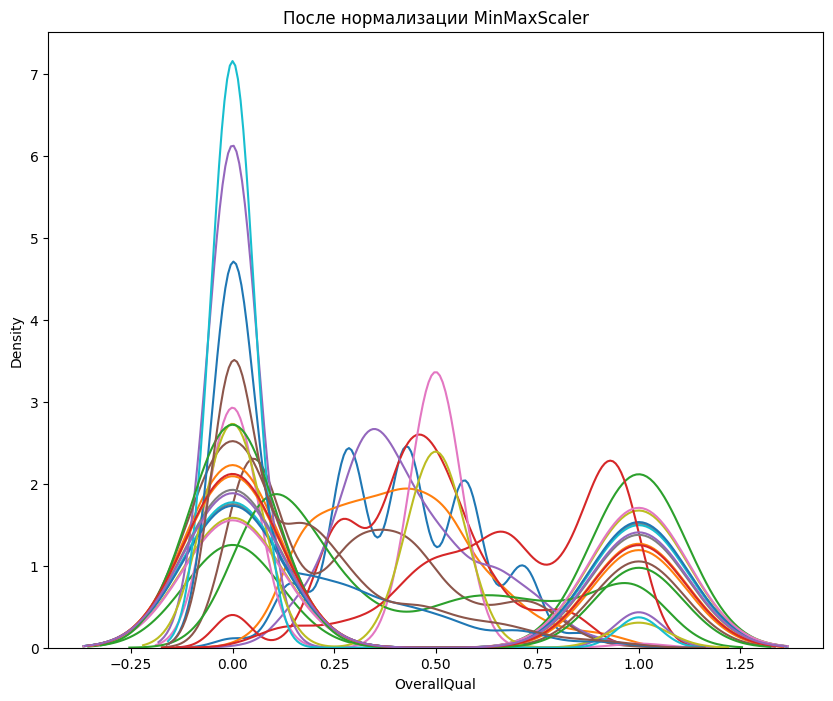

In [350]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')



for i in data_sorted.drop(columns=['SalePrice']).columns:
    sns.kdeplot(data=data_sorted[i], ax=ax1)
    


In [351]:
selector = SelectKBest(score_func=f_regression, k=9)

selector.fit(X=data_sorted.drop(columns=['SalePrice']), y=data_sorted['SalePrice'])

selector.get_feature_names_out()

array(['OverallQual', 'GrLivArea', 'ExterQual_TA',
       'GarageCars_GarageArea', '1stFlrSF_TotalBsmtSF', 'YearBuilt',
       'FullBath', 'GarageFinish_Unf', 'KitchenQual_TA'], dtype=object)

In [352]:
estimator = linear_model.LinearRegression()

selector = RFE(estimator=estimator, n_features_to_select=9)

selector.fit(X=data_sorted.drop(columns=['SalePrice']), y=data_sorted['SalePrice'])

selector.get_feature_names_out()

array(['OverallQual', 'GrLivArea', 'GarageCars_GarageArea',
       '1stFlrSF_TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'BsmtQual_Ex',
       'Fireplaces', 'KitchenQual_Ex'], dtype=object)

In [353]:
X, y = data_sorted.drop(columns=['SalePrice']), data_sorted['SalePrice']

In [354]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7, random_state=42)



Metrics of fitting:

49477.06 = RFE ['BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'HeatingQC_Fa', 'HeatingQC_Po']
       
31061 = SelectKBest  ['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'KitchenQual_TA',
       'GarageFinish_Unf']

29759.56 = Correlation with target 

In [355]:
linear = linear_model.LinearRegression()

linear.fit(X=X_train, y=y_train)

y_pred = linear.predict(X=X_test)

display(np.sqrt(metrics.mean_squared_error(y_pred=y_pred, y_true=y_test)))

display((metrics.mean_absolute_percentage_error(y_pred=y_pred, y_true=y_test)))

#39013
#39641

# after sigma 24390 - 20 
# 25165 - 30 features
# 25123 - 25 
# 26196 - 15

24383.538333263936

0.1081195034115221

# DEPLOY


In [356]:
data_for_submit = pd.read_csv('C:/Users/atade/OneDrive/Рабочий стол/Learning/test_prep.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/atade/OneDrive/Рабочий стол/Learning/test_prep.csv'

In [ ]:
X_train.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'YearBuilt', 'FullBath', 'GarageFinish_Unf',
       'KitchenQual_TA', 'YearRemodAdd', 'ExterQual_Gd', 'BsmtQual_TA',
       'Foundation_PConc', 'TotRmsAbvGrd', 'GarageYrBlt', 'BsmtQual_Ex',
       'Fireplaces', 'HeatingQC_Ex', 'BsmtFinType1_GLQ'],
      dtype='object')

In [ ]:
data_for_submit = data_for_submit[X_train.columns]

0       121949.744508
1       145998.154586
2       180024.560817
3       192357.625317
4       197801.263895
            ...      
1454     77007.623221
1455     90679.088101
1456    164122.809371
1457    120804.365207
1458    218471.004479
Name: SalePrice, Length: 1459, dtype: float64

In [ ]:
submisson = pd.DataFrame(linear.predict(data_for_submit), columns=[ 'SalePrice'])
submisson.reset_index(inplace=True)

submisson.drop(columns=['index'], inplace=True)
submisson.reset_index(drop=True, inplace=True)
submisson

,SalePrice
0,121949.744508
1,145998.154586
2,180024.560817
3,192357.625317
4,197801.263895
...,...
1454,77007.623221
1455,90679.088101
1456,164122.809371
1457,120804.365207


In [ ]:
submisson = pd.DataFrame(linear.predict(data_for_submit), columns=[ 'SalePrice'])
submisson.reset_index(inplace=True)
submisson['Id'] = submisson['index']+1461
submisson.drop(columns=['index'], inplace=True)
submisson.reset_index(drop=True, inplace=True)
submisson

,SalePrice,Id
0,121949.744508,1461
1,145998.154586,1462
2,180024.560817,1463
3,192357.625317,1464
4,197801.263895,1465
...,...,...
1454,77007.623221,2915
1455,90679.088101,2916
1456,164122.809371,2917
1457,120804.365207,2918


In [ ]:
pd.read_csv('C:/Users/atade/OneDrive/Рабочий стол/Learning/Training/House/sample_submission.csv')

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
submisson.to_csv('C:/Users/atade/OneDrive/Рабочий стол/Learning/test_ready.csv', index=False)